In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import warnings
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFECV
plt.style.use('seaborn-bright')

df = pd.read_csv('C:/ds_work/source_code/Project_DS/data/train.csv')

In [3]:
## 데이터프레임 만들기

df_notsleep = df[df['CryoSleep']==0]
df_notsleep

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
df_TRAPPIST = df_notsleep[df_notsleep['Destination']=='TRAPPIST-1e']
df_TRAPPIST

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8683,9272_02,Earth,False,F/1894/P,TRAPPIST-1e,21.0,False,86.0,3.0,149.0,208.0,329.0,Gordo Simson,False
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


## 행선지가 TRAPPIST-1e인 사람 중 동면하지 않은 사람의 Transported

<Figure size 936x288 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='Transported'>

Text(0.5, 1.0, 'Transported passangers in counts')

Text(False, 2669, '2669')

Text(True, 1229, '1229')

<AxesSubplot:>

([<matplotlib.patches.Wedge at 0x27317505340>,
 [Text(-0.6030874766246404, 0.9199377672095673, 'False'),
  Text(0.6030873904938482, -0.9199378236746877, 'True')],
 [Text(-0.328956805431622, 0.5017842366597639, '68.47%'),
  Text(0.3289567584511899, -0.5017842674589205, '31.53%')])

Text(0.5, 1.0, 'Transported passangers in %')

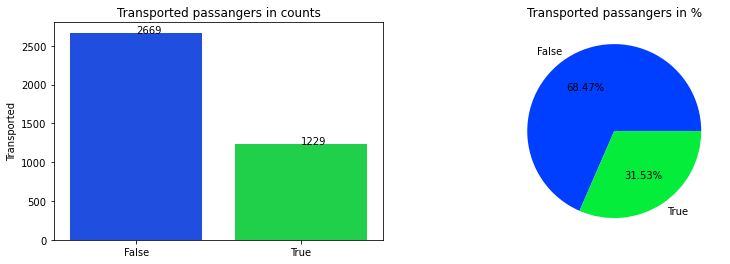

In [8]:
#Transported passangers in %
#Predictions: True for Transported, False for Lost) 
plt.figure(figsize=(13,4))
plt.subplot(121)
sbn.barplot(x=df_TRAPPIST.Transported.unique(), y=df_TRAPPIST.Transported.value_counts())
plt.title("Transported passangers in counts")
for i, j in zip(df_TRAPPIST.Transported.unique(), df_TRAPPIST.Transported.value_counts()):
    plt.annotate(str(j), xytext=(i, j), xy=(i, j))
plt.subplot(122)
plt.pie(df_TRAPPIST.Transported.value_counts(), labels=df_TRAPPIST.Transported.unique(), autopct='%.2f%%')
plt.title("Transported passangers in %")
plt.show()

#### 동면+TRAPPIST 행선지 = 3898명
#### 동면+TRAPPIST 행선지+Transported 성공 = 1229명(31.53%)
#### 동면+TRAPPIST 행선지+Transported 실패 = 2669명(68.47%)

## 나이별 시각화

### TRAPPIST의 나이 분포
#### 1. 출발지로 구분

<Figure size 1080x288 with 0 Axes>

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30'),
 Text(31, 0, '31'),
 Text(32, 0, '32'),
 Text(33, 0, '33'),
 Text(34, 0, '34'),
 Text(35, 0, '35'),
 Text(36, 0, '36'),
 Text(37, 0, '37'),
 Text(38, 0, '38'),
 Text(39, 0, '39'),
 Text(40, 0, '40'),
 Text(41, 0, '41'),
 Text(42, 0, '42'),
 Text(43, 0, '43'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '46'),
 Text(47, 0, '47'),
 Text(48, 0, '48'),
 Text(49, 0, '49'),
 Text(50, 0, '50'),


Text(0.5, 1.0, 'Visualizing people of different ages travelled to TRAPPIST-1e')

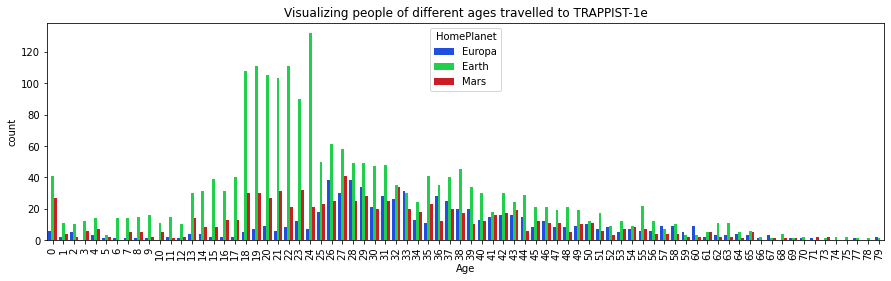

In [10]:
#Visualizing people of different ages travelled from HomePlanet
plt.figure(figsize=(15,4))
warnings.filterwarnings('ignore')
Age_nomiss=df_TRAPPIST[~(df_TRAPPIST.Age.isna())]
Age_nomiss['Age']=Age_nomiss.Age.astype('int')
g=sbn.countplot(data=Age_nomiss, x='Age', hue='HomePlanet')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Visualizing people of different ages travelled to TRAPPIST-1e")
plt.show()

#### 2. 도착지로 구분

<Figure size 1080x288 with 0 Axes>

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30'),
 Text(31, 0, '31'),
 Text(32, 0, '32'),
 Text(33, 0, '33'),
 Text(34, 0, '34'),
 Text(35, 0, '35'),
 Text(36, 0, '36'),
 Text(37, 0, '37'),
 Text(38, 0, '38'),
 Text(39, 0, '39'),
 Text(40, 0, '40'),
 Text(41, 0, '41'),
 Text(42, 0, '42'),
 Text(43, 0, '43'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '46'),
 Text(47, 0, '47'),
 Text(48, 0, '48'),
 Text(49, 0, '49'),
 Text(50, 0, '50'),


Text(0.5, 1.0, 'Visualizing people of different ages travelled to Destination')

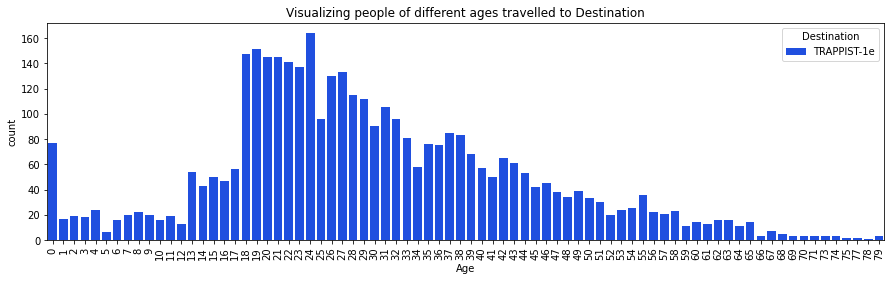

In [11]:
#Visualizing people of different ages travelled to Destination
plt.figure(figsize=(15,4))
warnings.filterwarnings('ignore')
Age_nomiss=df_TRAPPIST[~(df_TRAPPIST.Age.isna())]
Age_nomiss['Age']=Age_nomiss.Age.astype('int')
g=sbn.countplot(data=Age_nomiss, x='Age', hue='Destination')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Visualizing people of different ages travelled to Destination")
plt.show()

## VIP 여부
#### VIP인 사람 : 2.75%, VIP가 아닌 사람 : 97.25%

Text(0.5, 0, 'VIP')

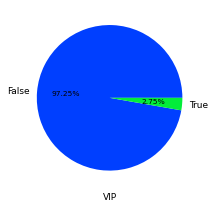

In [16]:
#Visualizing Percentages of people in 'VIP'
import matplotlib as mpl
mpl.rcParams['font.size'] = 9.0
fig = plt.figure(figsize=(15,9))
columns=['VIP']
for i, col in enumerate(columns):
    q, r = divmod(i,4)
    ax = fig.add_subplot(int(str(q+1)+"4"+str(r+1)))
    indeces = df_TRAPPIST[col].value_counts().index
    patches, texts, autotexts = ax.pie(df_TRAPPIST[col].value_counts(), labels=indeces, autopct='%.2f%%')
    for auto in autotexts:
        auto.set_fontsize(7.5)
    plt.xlabel(col)
plt.show()

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

<AxesSubplot:xlabel='Destination', ylabel='count'>

<AxesSubplot:xlabel='VIP', ylabel='count'>

ValueError: Could not interpret input 'Deck'

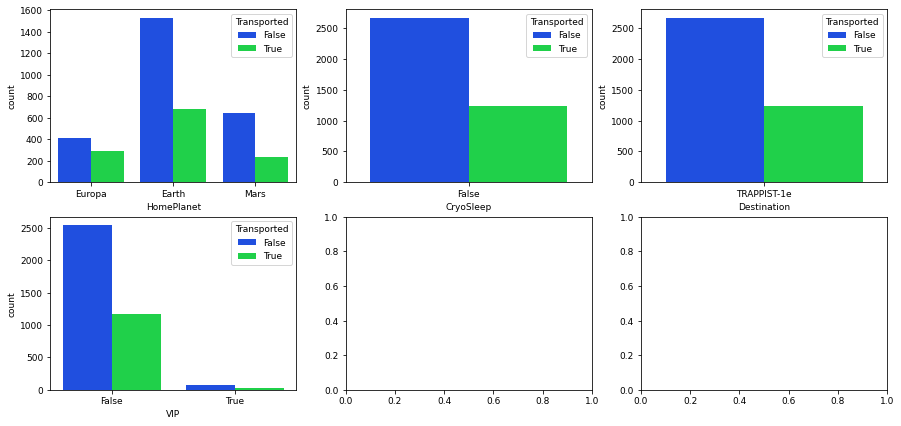

In [17]:
#Transported passangers in category wise
columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
q, r =divmod(len(columns), 3)
fig, ax=plt.subplots(q, 3, figsize=(15,7))
for i in range(0,len(columns)):
    q, r =divmod(i, 3)
    sbn.countplot(data=df_TRAPPIST, x=columns[i], hue='Transported', ax=ax[q, r])
plt.show()

In [18]:
df_TR = df_TRAPPIST.groupby('Transported').count()
df_TR

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
Transported,,,,,,,,,,,,,
False,2669,2596,2669,2619,2669,2611,2615,2603,2621,2618,2611,2614,2617
True,1229,1203,1229,1207,1229,1210,1199,1211,1201,1207,1206,1199,1190


<AxesSubplot:xlabel='Age', ylabel='Count'>

<AxesSubplot:xlabel='RoomService', ylabel='Count'>

<AxesSubplot:xlabel='FoodCourt', ylabel='Count'>

<AxesSubplot:xlabel='ShoppingMall', ylabel='Count'>

<AxesSubplot:xlabel='Spa', ylabel='Count'>

<AxesSubplot:xlabel='VRDeck', ylabel='Count'>

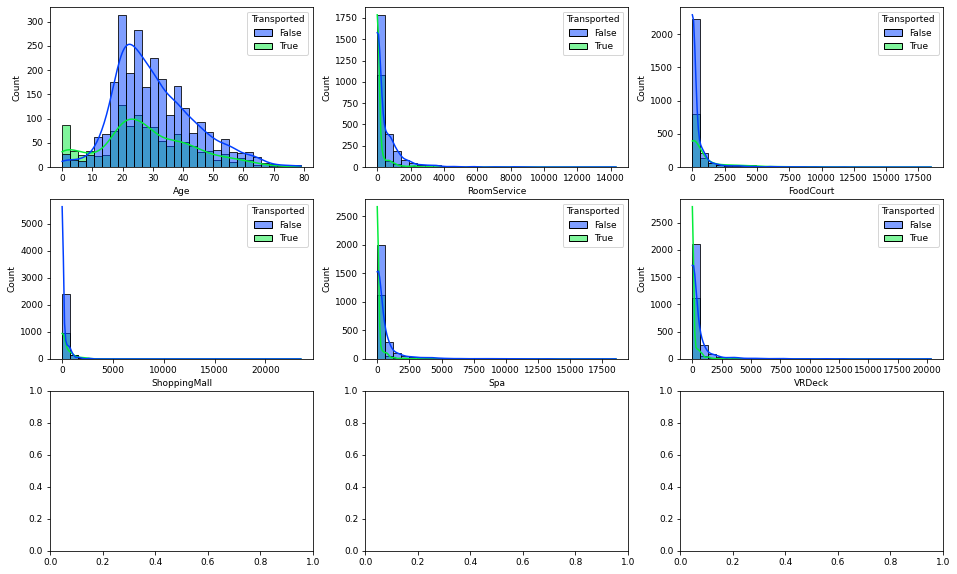

In [19]:
#Visualizing distribution of the data
columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
q, r =divmod(len(columns), 3)
fig, ax=plt.subplots(q+1, 3, figsize=(16,10))
for i in range(0,len(columns)):
    q, r =divmod(i, 3)
    sbn.histplot(data=df_TRAPPIST, x=columns[i], hue='Transported', ax=ax[q, r], kde=True, bins=30)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='RoomService'>

<AxesSubplot:xlabel='Age', ylabel='FoodCourt'>

<AxesSubplot:xlabel='Age', ylabel='ShoppingMall'>

<AxesSubplot:xlabel='Age', ylabel='Spa'>

<AxesSubplot:xlabel='Age', ylabel='VRDeck'>

<AxesSubplot:xlabel='RoomService', ylabel='FoodCourt'>

<AxesSubplot:xlabel='RoomService', ylabel='ShoppingMall'>

<AxesSubplot:xlabel='RoomService', ylabel='Spa'>

<AxesSubplot:xlabel='RoomService', ylabel='VRDeck'>

<AxesSubplot:xlabel='FoodCourt', ylabel='ShoppingMall'>

<AxesSubplot:xlabel='FoodCourt', ylabel='Spa'>

<AxesSubplot:xlabel='FoodCourt', ylabel='VRDeck'>

<AxesSubplot:xlabel='ShoppingMall', ylabel='Spa'>

<AxesSubplot:xlabel='ShoppingMall', ylabel='VRDeck'>

<AxesSubplot:xlabel='Spa', ylabel='VRDeck'>

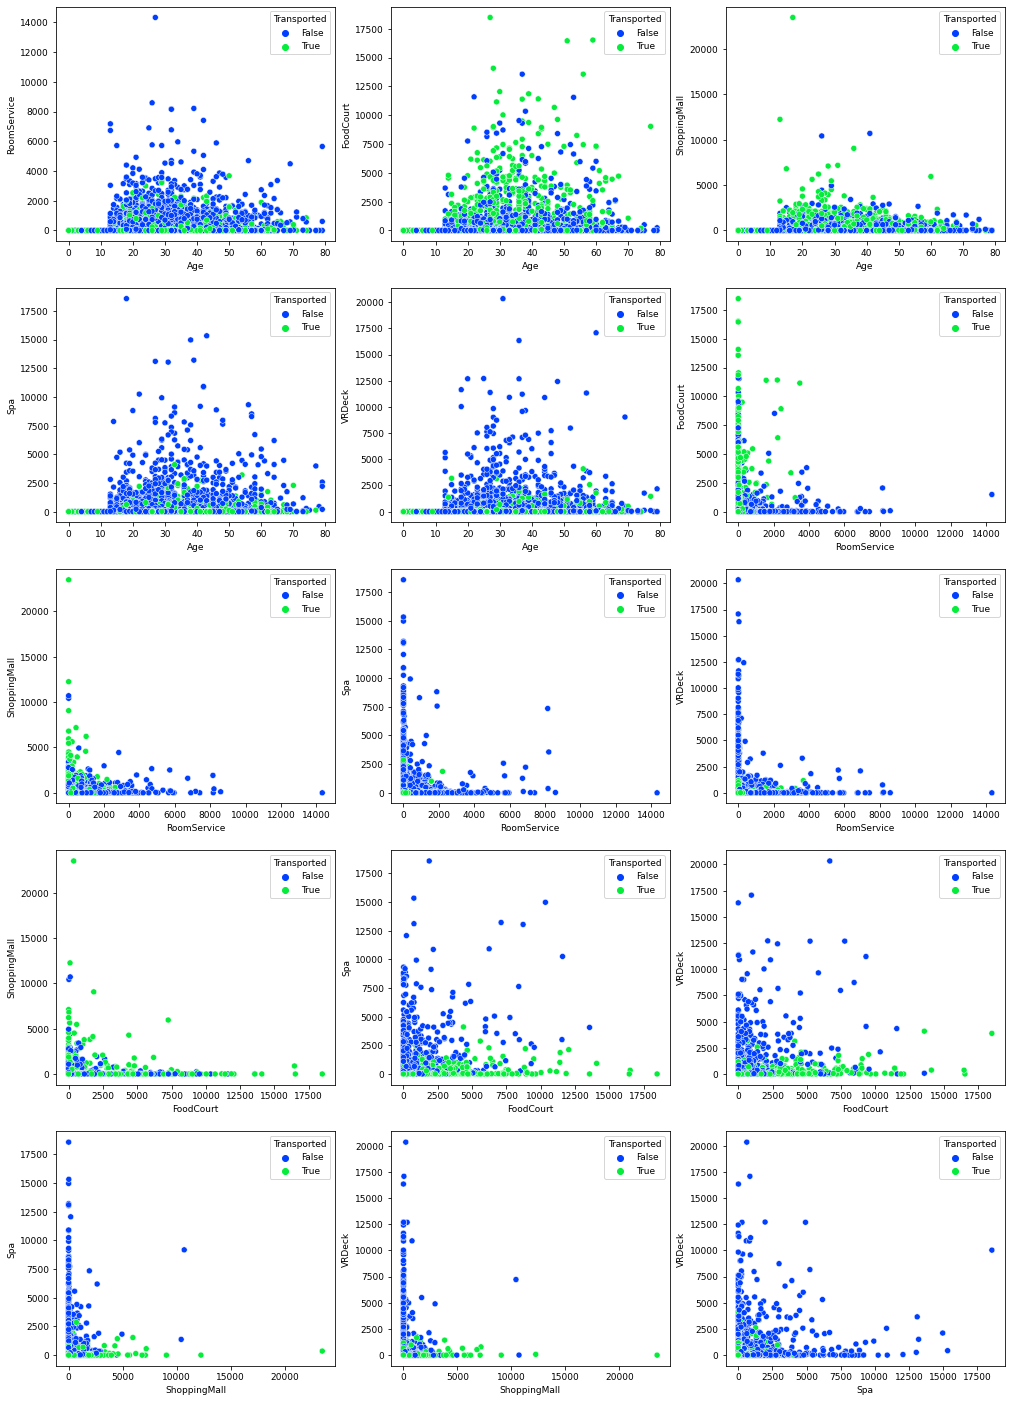

In [20]:
#Visualizing Relationships between variables 
columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
q, r =divmod(int(len(columns)*(len(columns)-1)/2), 3)
fig, ax=plt.subplots(q, 3, figsize=(17,25))
k=0
for i in range(0,len(columns)):
    for j in range(i+1,len(columns)):
        q, r =divmod(k, 3)
        k+=1
        sbn.scatterplot(data=df_TRAPPIST, x=columns[i], y=columns[j], ax=ax[q, r], hue='Transported')
plt.show()

<Figure size 792x792 with 0 Axes>

<AxesSubplot:>

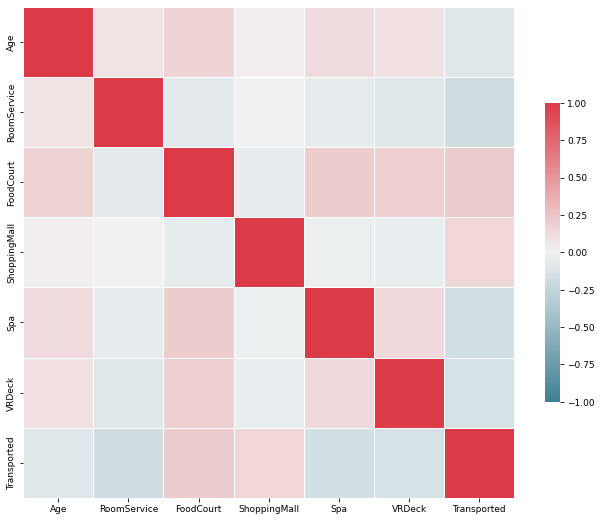

In [21]:
corr = df_TRAPPIST.corr(method='pearson')
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.diverging_palette(220,10,as_cmap=True)

plt.figure(figsize =(11,11))
sns.heatmap(corr, cmap = cmap, vmax=1.0, vmin = -1.0, center =0, square= True, linewidths=.5, cbar_kws={'shrink':.5})
plt.show()